In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('tonytan').getOrCreate()
df = spark.read.load('./BankChurners.csv',format="csv",header="true")
df.printSchema()

root
 |-- CLIENTNUM: string (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: string (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: string (nullable = true)
 |-- Total_Relationship_Count: string (nullable = true)
 |-- Months_Inactive_12_mon: string (nullable = true)
 |-- Contacts_Count_12_mon: string (nullable = true)
 |-- Credit_Limit: string (nullable = true)
 |-- Total_Revolving_Bal: string (nullable = true)
 |-- Avg_Open_To_Buy: string (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: string (nullable = true)
 |-- Total_Trans_Amt: string (nullable = true)
 |-- Total_Trans_Ct: string (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: string (nullable = true)
 |-- Avg_Utilization_Ratio: string (nullable = 

In [3]:
df.count()

10127

In [4]:
len(df.columns)

21

In [5]:
for item in df.head():
    print(item)

768805383
Existing Customer
45
M
3
High School
Married
$60K - $80K
Blue
39
5
1
3
12691
777
11914
1.335
1144
42
1.625
0.061


In [6]:
df.describe().show()

+-------+-------------------+-----------------+-----------------+------+------------------+---------------+--------------+---------------+-------------+------------------+------------------------+----------------------+---------------------+-----------------+-------------------+-----------------+--------------------+------------------+-----------------+-------------------+---------------------+
|summary|          CLIENTNUM|   Attrition_Flag|     Customer_Age|Gender|   Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|    Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|     Credit_Limit|Total_Revolving_Bal|  Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|   Total_Trans_Amt|   Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|
+-------+-------------------+-----------------+-----------------+------+------------------+---------------+--------------+---------------+-------------+------------------+------------------------+--------

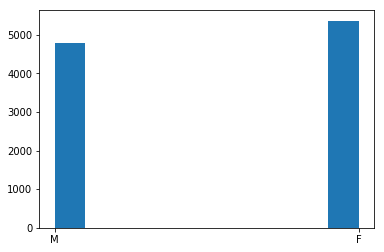

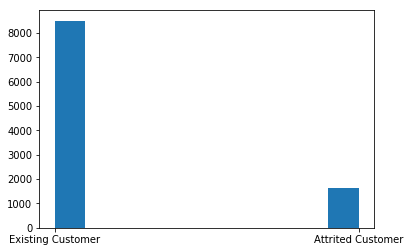

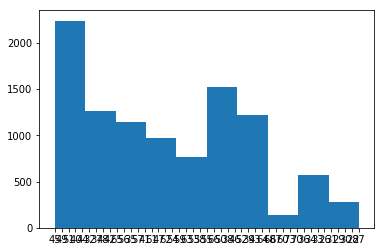

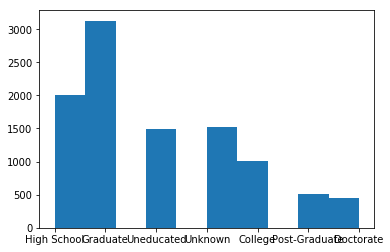

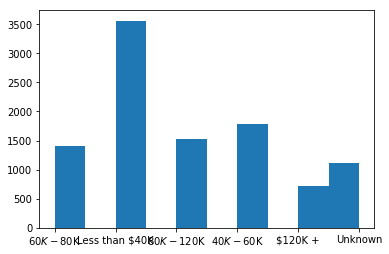

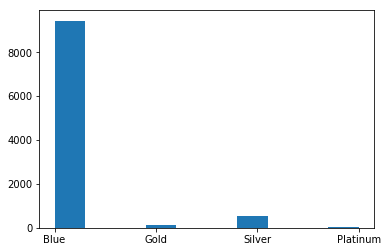

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# data exploration 
sexArr = np.array(df.select('Gender').collect())
plt.hist(sexArr)
plt.show()

sexArr = np.array(df.select('Attrition_Flag').collect())
plt.hist(sexArr)
plt.show()

sexArr = np.array(df.select('Customer_Age').collect())
plt.hist(sexArr)
plt.show()

sexArr = np.array(df.select('Education_level').collect())
plt.hist(sexArr)
plt.show()

sexArr = np.array(df.select('Income_Category').collect())
plt.hist(sexArr)
plt.show()

a = np.array(df.select('Card_Category').collect())
plt.hist(a)
plt.show()

In [10]:
# null values
for col in df.columns:
    print(col.ljust(20), df.filter(df[col].isNull()).count())

CLIENTNUM            0
Attrition_Flag       0
Customer_Age         0
Gender               0
Dependent_count      0
Education_Level      0
Marital_Status       0
Income_Category      0
Card_Category        0
Months_on_book       0
Total_Relationship_Count 0
Months_Inactive_12_mon 0
Contacts_Count_12_mon 0
Credit_Limit         1
Total_Revolving_Bal  0
Avg_Open_To_Buy      1
Total_Amt_Chng_Q4_Q1 0
Total_Trans_Amt      1
Total_Trans_Ct       0
Total_Ct_Chng_Q4_Q1  0
Avg_Utilization_Ratio 0


In [11]:
# reduce data
df3=df.drop("CLIENTNUM")
print(df3.columns)
print(len(df3.columns))

['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
20


In [12]:
# remove all the null
df4=df3.na.drop()
df4.count()

10124

In [13]:
# construct the data
df5 = df4.withColumn('Average_Amount_per_Transaction', df4['Total_Trans_Amt']/df4['Total_Trans_Ct']).\
            drop('Total_Trans_Amt', 'Total_Trans_Ct')
df5.columns

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Average_Amount_per_Transaction']

In [14]:
print(len(df5.columns))

19


In [15]:
# change data type
df5.printSchema()

root
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: string (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: string (nullable = true)
 |-- Total_Relationship_Count: string (nullable = true)
 |-- Months_Inactive_12_mon: string (nullable = true)
 |-- Contacts_Count_12_mon: string (nullable = true)
 |-- Credit_Limit: string (nullable = true)
 |-- Total_Revolving_Bal: string (nullable = true)
 |-- Avg_Open_To_Buy: string (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: string (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: string (nullable = true)
 |-- Avg_Utilization_Ratio: string (nullable = true)
 |-- Average_Amount_per_Transaction: double (nullable = true)



In [16]:
from pyspark.sql.types import DoubleType
df6 = df5.withColumn("Customer_Age",df["Customer_Age"].cast(DoubleType())) \
    .withColumn("Dependent_count",df["Dependent_count"].cast(DoubleType()))\
    .withColumn("Months_on_book",df["Months_on_book"].cast(DoubleType()))\
    .withColumn("Total_Relationship_Count",df["Total_Relationship_Count"].cast(DoubleType())) \
    .withColumn("Months_Inactive_12_mon",df["Months_Inactive_12_mon"].cast(DoubleType()))\
    .withColumn("Contacts_Count_12_mon",df["Contacts_Count_12_mon"].cast(DoubleType())) \
    .withColumn("Credit_Limit",df["Credit_Limit"].cast(DoubleType()))\
    .withColumn("Total_Revolving_Bal",df["Total_Revolving_Bal"].cast(DoubleType())) \
    .withColumn("Avg_Open_To_Buy",df["Avg_Open_To_Buy"].cast(DoubleType()))\
    .withColumn("Total_Amt_Chng_Q4_Q1",df["Total_Amt_Chng_Q4_Q1"].cast(DoubleType())) \
    .withColumn("Total_Ct_Chng_Q4_Q1",df["Total_Ct_Chng_Q4_Q1"].cast(DoubleType()))\
    .withColumn("Avg_Utilization_Ratio",df["Avg_Utilization_Ratio"].cast(DoubleType()))

df6.printSchema()

root
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: double (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: double (nullable = true)
 |-- Total_Relationship_Count: double (nullable = true)
 |-- Months_Inactive_12_mon: double (nullable = true)
 |-- Contacts_Count_12_mon: double (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: double (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)
 |-- Average_Amount_per_Transaction: double (nullable = true)



In [17]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

stringIndex = [StringIndexer(inputCol="Attrition_Flag", outputCol="AttritionNum"),StringIndexer(inputCol="Gender", outputCol="GenderNum"),StringIndexer(inputCol="Education_Level", outputCol="EducationNum"),StringIndexer(inputCol="Marital_Status", outputCol="MaritalNum"),StringIndexer(inputCol="Income_Category", outputCol="IncomeNum"),StringIndexer(inputCol="Card_Category", outputCol="CardNum")]
pipe=Pipeline(stages=stringIndex)
stringIndex_model = pipe.fit(df6)
df1_ = stringIndex_model.transform(df6)
df7=df1_.drop("Attrition_Flag","Gender","Education_Level","Marital_Status","Income_Category","Card_Category")
df7.show(4)
df7.printSchema()

+------------+---------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+-------------------+---------------------+------------------------------+------------+---------+------------+----------+---------+-------+
|Customer_Age|Dependent_count|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Average_Amount_per_Transaction|AttritionNum|GenderNum|EducationNum|MaritalNum|IncomeNum|CardNum|
+------------+---------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+-------------------+---------------------+------------------------------+------------+---------+------------+----------+---------+-------+
|        45.0|            3.

In [19]:
# reduce data
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

vec_asmbl = VectorAssembler(inputCols=df7.columns[0:], 
                           outputCol='features')

df7_ = vec_asmbl.transform(df7).select('features', 'AttritionNum')
df7_.show(4, truncate=False)


from pyspark.ml.regression import LinearRegression
train_data,test_data = df7_.randomSplit([0.8,0.2])
lr = LinearRegression(labelCol='AttritionNum')
lrModel = lr.fit(train_data)
print("Coefficients: {}".format(str(lrModel.coefficients)))
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))

+--------------------------------------------------------------------------------------------------------------+------------+
|features                                                                                                      |AttritionNum|
+--------------------------------------------------------------------------------------------------------------+------------+
|[45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1.625,0.061,27.238095238095237,0.0,1.0,1.0,0.0,3.0,0.0]|0.0         |
|[49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,3.714,0.105,39.121212121212125,0.0,0.0,0.0,1.0,0.0,0.0]  |0.0         |
|[51.0,3.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,2.333,0.0,94.35,0.0,1.0,0.0,0.0,2.0,0.0]                   |0.0         |
|[40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,2.333,0.76,58.55,0.0,0.0,1.0,2.0,0.0,0.0]                |0.0         |
+--------------------------------------------------------------------------------------------------------------+------

In [25]:
#reduce data and separate features/target
from pyspark.ml.feature import StringIndexer, VectorAssembler

dfa=df7.drop("Avg_Open_To_Buy")
dfb=dfa.drop("AttritionNum")

vec_asmbl = VectorAssembler(inputCols=dfb.columns[0:], 
                           outputCol='features')

df8 = vec_asmbl.transform(dfa).select('features', 'AttritionNum')
df8.show(4, truncate=False)


+--------------------------------------------------------------------------------------------------+------------+
|features                                                                                          |AttritionNum|
+--------------------------------------------------------------------------------------------------+------------+
|[45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,1.335,1.625,0.061,27.238095238095237,1.0,1.0,0.0,3.0,0.0]|0.0         |
|[49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,1.541,3.714,0.105,39.121212121212125,0.0,0.0,1.0,0.0,0.0] |0.0         |
|[51.0,3.0,36.0,4.0,1.0,0.0,3418.0,0.0,2.594,2.333,0.0,94.35,1.0,0.0,0.0,2.0,0.0]                  |0.0         |
|[40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,1.405,2.333,0.76,58.55,0.0,1.0,2.0,0.0,0.0]              |0.0         |
+--------------------------------------------------------------------------------------------------+------------+
only showing top 4 rows



In [26]:
#logistic regression
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

train_df, valid_df = df8.randomSplit([0.8,0.2])

evaluator = MulticlassClassificationEvaluator(labelCol='AttritionNum', 
                                          metricName='accuracy')
ridge = LogisticRegression(labelCol='AttritionNum', 
                        maxIter=100, 
                        elasticNetParam=0, # Ridge regression is choosen 
                        regParam=0.03)

model = ridge.fit(train_df)
pred = model.transform(valid_df)
print(evaluator.evaluate(pred))

from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'AttritionNum')

print("DTC")
print(my_binary_eval.evaluate(pred))

0.8683291770573566
DTC
0.8261244499263108


In [27]:
#Decision tree and random forest
from pyspark.ml.classification import DecisionTreeClassifier,RandomForestClassifier
from pyspark.ml import Pipeline
train_data,test_data = df8.randomSplit([0.8,0.2])
dtc = DecisionTreeClassifier(labelCol='AttritionNum',featuresCol='features')
rfc = RandomForestClassifier(labelCol='AttritionNum',featuresCol='features')

dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)


dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)

from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'AttritionNum')

print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))



from pyspark.ml.evaluation import MulticlassClassificationEvaluator
 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="AttritionNum", predictionCol="prediction", metricName="accuracy")

dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)

print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))

DTC
0.38622073829531817
RFC
0.8993725615246111
Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 88.22%
----------------------------------------
A random forest ensemble has an accuracy of: 88.92%


In [29]:
# iteration Logistic regression
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

train_df, valid_df = df8.randomSplit([0.67,0.33])

evaluator = MulticlassClassificationEvaluator(labelCol='AttritionNum', 
                                          metricName='accuracy')
ridge = LogisticRegression(labelCol='AttritionNum', 
                        maxIter=100, 
                        elasticNetParam=0, # Ridge regression is choosen 
                        regParam=0.03)

model = ridge.fit(train_df)
pred = model.transform(valid_df)
print(evaluator.evaluate(pred))

from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'AttritionNum')

print("DTC")
print(my_binary_eval.evaluate(pred))

0.8802753666566896
DTC
0.8481891846093598


In [30]:
# Iterate DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline
train_data,test_data = df8.randomSplit([0.67,0.33])
dtc = DecisionTreeClassifier(labelCol='AttritionNum',featuresCol='features')
rfc = RandomForestClassifier(labelCol='AttritionNum',featuresCol='features')
gbt = GBTClassifier(labelCol='AttritionNum',featuresCol='features')

dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)
gbt_model = gbt.fit(train_data)


dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)
gbt_predictions = gbt_model.transform(test_data)

from pyspark.ml.evaluation import BinaryClassificationEvaluator

my_binary_eval = BinaryClassificationEvaluator(labelCol = 'AttritionNum')

print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
print("RFC")
print(my_binary_eval.evaluate(rfc_predictions))

# We can't repeat these exact steps for GBT. If you print the schema of all three, you may be able to notice why.
# Instead, let's redefine the object:
my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='AttritionNum', rawPredictionCol='prediction')
print("GBT")
print(my_binary_gbt_eval.evaluate(gbt_predictions))



from pyspark.ml.evaluation import MulticlassClassificationEvaluator
 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="AttritionNum", predictionCol="prediction", metricName="accuracy")

dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)
gbt_acc = acc_evaluator.evaluate(gbt_predictions)

print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
print('-'*40)
print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

DTC
0.4791455507574062
RFC
0.89460887258021
GBT
0.7746581423365283
Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 88.54%
----------------------------------------
A random forest ensemble has an accuracy of: 88.77%
----------------------------------------
An ensemble using GBT has an accuracy of: 90.38%
